
# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd
import numpy as np
import pickle

In [ ]:
path = "/content/drive/MyDrive/ml project CS725/dataset.csv"
df_initial = pd.read_csv(path)

In [ ]:
df_initial

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20,feature-21,output
0,"['0.725590169429779', '0.6736711263656616', '-...","['0.7996407747268677', '0.6100149154663086', '...","['0.8520725965499878', '0.5044351816177368', '...","['0.8638474941253662', '0.42230579257011414', ...","['0.8577829599380493', '0.3581676483154297', '...","['0.7952868938446045', '0.43869462609291077', ...","['0.7933093905448914', '0.3830936849117279', '...","['0.7829983234405518', '0.44360172748565674', ...","['0.7795369029045105', '0.5070999264717102', '...","['0.7342169284820557', '0.4503481090068817', '...","['0.7332994341850281', '0.4003942906856537', '...","['0.7309172749519348', '0.4812753200531006', '...","['0.7373020052909851', '0.5545471906661987', '...","['0.6774176955223083', '0.4674155116081238', '...","['0.6808137893676758', '0.4289851486682892', '...","['0.684715986251831', '0.508196234703064', '-0...","['0.6927409768104553', '0.5749028921127319', '...","['0.624476969242096', '0.49036383628845215', '...","['0.6296980977058411', '0.45469820499420166', ...","['0.641358494758606', '0.5138505101203918', '-...","['0.6508588194847107', '0.5641113519668579', '...",A
1,"['0.720234215259552', '0.7270039319992065', '-...","['0.8297205567359924', '0.6492838859558105', '...","['0.895837664604187', '0.49593114852905273', '...","['0.8907626867294312', '0.3688010573387146', '...","['0.8762158751487732', '0.263727605342865', '-...","['0.7870860695838928', '0.3878140449523926', '...","['0.8230147957801819', '0.3072429299354553', '...","['0.832259476184845', '0.4117307662963867', '-...","['0.8310205936431885', '0.5040338039398193', '...","['0.7023136615753174', '0.40173789858818054', ...","['0.7512853741645813', '0.33415842056274414', ...","['0.7706477642059326', '0.4642625153064728', '...","['0.7770916223526001', '0.5643668174743652', '...","['0.6192111968994141', '0.4327473044395447', '...","['0.6793495416641235', '0.39152008295059204', ...","['0.7017439603805542', '0.5291446447372437', '...","['0.7070868611335754', '0.6199275255203247', '...","['0.5349651575088501', '0.47719132900238037', ...","['0.600101113319397', '0.45136138796806335', '...","['0.632155179977417', '0.5488680005073547', '-...","['0.643118143081665', '0.6148363947868347', '-...",A
2,"['0.718411922454834', '0.7553156018257141', '-...","['0.8323488831520081', '0.6649652719497681', '...","['0.8985246419906616', '0.5051681399345398', '...","['0.8960521221160889', '0.378969669342041', '-...","['0.8857403993606567', '0.27281084656715393', ...","['0.7937150597572327', '0.39698103070259094', ...","['0.8304138779640198', '0.3153507709503174', '...","['0.8425502777099609', '0.41805368661880493', ...","['0.8448439836502075', '0.5106550455093384', '...","['0.7092565894126892', '0.4138254225254059', '...","['0.7571093440055847', '0.34334442019462585', ...","['0.7752203941345215', '0.4736936688423157', '...","['0.7874557971954346', '0.5761771202087402', '...","['0.6262134909629822', '0.44407665729522705', ...","['0.6856838464736938', '0.4052448570728302', '...","['0.7069348692893982', '0.5424405336380005', '...","['0.7185530662536621', '0.6330284476280212', '...","['0.5427271127700806', '0.4886350631713867', '...","['0.6108312010765076', '0.4598273038864136', '...","['0.6384474039077759', '0.5590997338294983', '...","['0.6495636701583862', '0.6252011656761169', '...",A
3,"['0.7291296124458313', '0.7714834213256836', '...","['0.8486229777336121', '0.6646771430969238', '...","['0.9141852259635925', '0.5125835537910461', '...","['0.914303183555603', '0.38868510723114014', '...","['0.8960881233215332', '0.282864511013031', '-...","['0.798166036605835', '0.40555500984191895', '...","['0.8305409550666809', '0.3192366361618042', '...","['0.8498249053955078', '0.41964027285575867', ...","['0.8556845188140869', '0.5140042304992676', '...","['0.7131610

In [ ]:
# preprocessing for further splitting
for i in range(df_initial.shape[1]-1):
    j = i+1
    df_initial[f"feature-{j}"] = df_initial[f"feature-{j}"].apply(eval)
    

In [ ]:
df_initial

,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,feature-10,feature-11,feature-12,feature-13,feature-14,feature-15,feature-16,feature-17,feature-18,feature-19,feature-20,feature-21,output
0,"[0.725590169429779, 0.6736711263656616, -7.008...","[0.7996407747268677, 0.6100149154663086, -0.03...","[0.8520725965499878, 0.5044351816177368, -0.04...","[0.8638474941253662, 0.42230579257011414, -0.0...","[0.8577829599380493, 0.3581676483154297, -0.06...","[0.7952868938446045, 0.43869462609291077, -0.0...","[0.7933093905448914, 0.3830936849117279, -0.05...","[0.7829983234405518, 0.44360172748565674, -0.0...","[0.7795369029045105, 0.5070999264717102, -0.09...","[0.7342169284820557, 0.4503481090068817, -0.00...","[0.7332994341850281, 0.4003942906856537, -0.05...","[0.7309172749519348, 0.4812753200531006, -0.06...","[0.7373020052909851, 0.5545471906661987, -0.06...","[0.6774176955223083, 0.4674155116081238, -0.00...","[0.6808137893676758, 0.4289851486682892, -0.05...","[0.684715986251831, 0.508196234703064, -0.0510...","[0.6927409768104553, 0.5749028921127319, -0.03...","[0.624476969242096, 0.49036383628845215, -0.01...","[0.6296980977058411, 0.45469820499420166, -0.0...","[0.641358494758606, 0.5138505101203918, -0.034...","[0.6508588194847107, 0.5641113519668579, -0.01...",A
1,"[0.720234215259552, 0.7270039319992065, -1.442...","[0.8297205567359924, 0.6492838859558105, -0.04...","[0.895837664604187, 0.49593114852905273, -0.06...","[0.8907626867294312, 0.3688010573387146, -0.07...","[0.8762158751487732, 0.263727605342865, -0.079...","[0.7870860695838928, 0.3878140449523926, -0.01...","[0.8230147957801819, 0.3072429299354553, -0.09...","[0.832259476184845, 0.4117307662963867, -0.130...","[0.8310205936431885, 0.5040338039398193, -0.13...","[0.7023136615753174, 0.40173789858818054, -0.0...","[0.7512853741645813, 0.33415842056274414, -0.1...","[0.7706477642059326, 0.4642625153064728, -0.12...","[0.7770916223526001, 0.5643668174743652, -0.11...","[0.6192111968994141, 0.4327473044395447, -0.03...","[0.6793495416641235, 0.39152008295059204, -0.1...","[0.7017439603805542, 0.5291446447372437, -0.11...","[0.7070868611335754, 0.6199275255203247, -0.07...","[0.5349651575088501, 0.47719132900238037, -0.0...","[0.600101113319397, 0.45136138796806335, -0.11...","[0.632155179977417, 0.5488680005073547, -0.103...","[0.643118143081665, 0.6148363947868347, -0.074...",A
2,"[0.718411922454834, 0.7553156018257141, -5.921...","[0.8323488831520081, 0.6649652719497681, -0.04...","[0.8985246419906616, 0.5051681399345398, -0.05...","[0.8960521221160889, 0.378969669342041, -0.065...","[0.8857403993606567, 0.27281084656715393, -0.0...","[0.7937150597572327, 0.39698103070259094, -0.0...","[0.8304138779640198, 0.3153507709503174, -0.08...","[0.8425502777099609, 0.41805368661880493, -0.1...","[0.8448439836502075, 0.5106550455093384, -0.12...","[0.7092565894126892, 0.4138254225254059, -0.00...","[0.7571093440055847, 0.34334442019462585, -0.0...","[0.7752203941345215, 0.4736936688423157, -0.11...","[0.7874557971954346, 0.5761771202087402, -0.09...","[0.6262134909629822, 0.44407665729522705, -0.0...","[0.6856838464736938, 0.4052448570728302, -0.11...","[0.7069348692893982, 0.5424405336380005, -0.09...","[0.7185530662536621, 0.6330284476280212, -0.05...","[0.5427271127700806, 0.4886350631713867, -0.04...","[0.6108312010765076, 0.4598273038864136, -0.09...","[0.6384474039077759, 0.5590997338294983, -0.08...","[0.6495636701583862, 0.6252011656761169, -0.05...",A
3,"[0.7291296124458313, 0.7714834213256836, -6.70...","[0.8486229777336121, 0.6646771430969238, -0.04...","[0.9141852259635925, 0.5125835537910461, -0.05...","[0.914303183555603, 0.38868510723114014, -0.07...","[0.8960881233215332, 0.282864511013031, -0.085...","[0.798166036605835, 0.40555500984191895, -0.00...","[0.8305409550666809, 0.3192366361618042, -0.08...","[0.8498249053955078, 0.41964027285575867, -0.1...","[0.8556845188140869, 0.5140042304992676, -0.14...","[0.71316105

In [ ]:
#removing z-coordinate and splitting x and y coordinates
df_final = pd.DataFrame()
for i in range(df_initial.shape[1]-1):
    j = i+1
    split_df = pd.DataFrame(df_initial[f"feature-{j}"].tolist(), columns = [f'feature-{j}-x',f'feature-{j}-y',f'feature-{j}-z'])
    split_df.drop(split_df.columns[len(split_df.columns)-1], axis=1, inplace=True)
    #print(split_df)
    df_final= pd.concat([df_final, split_df], axis=1)

output_df = pd.DataFrame(df_initial['output'])

In [ ]:
feature_names = list(df_final.columns)
df_final

,feature-1-x,feature-1-y,feature-2-x,feature-2-y,feature-3-x,feature-3-y,feature-4-x,feature-4-y,feature-5-x,feature-5-y,feature-6-x,feature-6-y,feature-7-x,feature-7-y,feature-8-x,feature-8-y,feature-9-x,feature-9-y,feature-10-x,feature-10-y,feature-11-x,feature-11-y,feature-12-x,feature-12-y,feature-13-x,feature-13-y,feature-14-x,feature-14-y,feature-15-x,feature-15-y,feature-16-x,feature-16-y,feature-17-x,feature-17-y,feature-18-x,feature-18-y,feature-19-x,feature-19-y,feature-20-x,feature-20-y,feature-21-x,feature-21-y
0,0.725590169429779,0.6736711263656616,0.7996407747268677,0.6100149154663086,0.8520725965499878,0.5044351816177368,0.8638474941253662,0.42230579257011414,0.8577829599380493,0.3581676483154297,0.7952868938446045,0.43869462609291077,0.7933093905448914,0.3830936849117279,0.7829983234405518,0.44360172748565674,0.7795369029045105,0.5070999264717102,0.7342169284820557,0.4503481090068817,0.7332994341850281,0.4003942906856537,0.7309172749519348,0.4812753200531006,0.7373020052909851,0.5545471906661987,0.6774176955223083,0.4674155116081238,0.6808137893676758,0.4289851486682892,0.684715986251831,0.508196234703064,0.6927409768104553,0.5749028921127319,0.624476969242096,0.49036383628845215,0.6296980977058411,0.45469820499420166,0.641358494758606,0.5138505101203918,0.6508588194847107,0.5641113519668579
1,0.720234215259552,0.7270039319992065,0.8297205567359924,0.6492838859558105,0.895837664604187,0.49593114852905273,0.8907626867294312,0.3688010573387146,0.8762158751487732,0.263727605342865,0.7870860695838928,0.3878140449523926,0.8230147957801819,0.3072429299354553,0.832259476184845,0.4117307662963867,0.8310205936431885,0.5040338039398193,0.7023136615753174,0.40173789858818054,0.7512853741645813,0.33415842056274414,0.7706477642059326,0.4642625153064728,0.7770916223526001,0.5643668174743652,0.6192111968994141,0.4327473044395447,0.6793495416641235,0.39152008295059204,0.7017439603805542,0.5291446447372437,0.7070868611335754,0.6199275255203247,0.5349651575088501,0.47719132900238037,0.600101113319397,0.45136138796806335,0.632155179977417,0.5488680005073547,0.643118143081665,0.6148363947868347
2,0.718411922454834,0.7553156018257141,0.8323488831520081,0.6649652719497681,0.8985246419906616,0.5051681399345398,0.8960521221160889,0.378969669342041,0.8857403993606567,0.27281084656715393,0.7937150597572327,0.39698103070259094,0.8304138779640198,0.3153507709503174,0.8425502777099609,0.41805368661880493,0.8448439836502075,0.5106550455093384,0.7092565894126892,0.4138254225254059,0.7571093440055847,0.34334442019462585,0.7752203941345215,0.4736936688423157,0.7874557971954346,0.5761771202087402,0.6262134909629822,0.44407665729522705,0.6856838464736938,0.4052448570728302,0.7069348692893982,0.5424405336380005,0.7185530662536621,0.6330284476280212,0.5427271127700806,0.4886350631713867,0.6108312010765076,0.4598273038864136,0.6384474039077759,0.5590997338294983,0.6495636701583862,0.6252011656761169
3,0.7291296124458313,0.7714834213256836,0.8486229777336121,0.6646771430969238,0.9141852259635925,0.5125835537910461,0.914303183555603,0.38868510723114014,0.8960881233215332,0.282864511013031,0.798166036605835,0.40555500984191895,0.8305409550666809,0.3192366361618042,0.8498249053955078,0.41964027285575867,0.8556845188140869,0.5140042304992676,0.713161051273346,0.4268374741077423,0.7599017024040222,0.35830891132354736,0.7835578322410583,0.485566109418869,0.7949865460395813,0.5843619108200073,0.6301378011703491,0.4592849910259247,0.6944410800933838,0.41658806800842285,0.7177642583847046,0.5501536726951599,0.7249090075492859,0.6420950889587402,0.5473742485046387,0.5040707588195801,0.6179893612861633,0.4696943163871765,0.6482603549957275,0.5635300874710083,0.6549386382102966,0.6310846209526062
4,0.7258270382881165,0.7799994349479675,0.8502374887466431,0.6802464723587036,0.9222943186759949,0.5295413732528687,0.9250893592834473,0.4047178328037262,0.9132453203201294,0.29860353469848633,0.8091264963150024,0.41582632064819336,0.8422787189483643,0.3333264887332916

# Train, Test Data split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
#Preprocessing
X_total = np.array(df_final)
Y_total = output_df[['output']].to_numpy()
X_total_scaled = preprocessing.StandardScaler().fit(X_total)

In [ ]:
#splitting training and testing
x_train, x_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.20, random_state=0)

# Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

print("x_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("x_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

x_train dataset:  (49260, 42)
y_train dataset:  (49260, 1)
x_test dataset:  (12315, 42)
y_test dataset:  (12315, 1)


In [ ]:
print("Before OverSampling x_train dataset: ", x_train.shape)
print("Before OverSampling y_train dataset: ", y_train.shape)


#asl_list = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','space','T','U','V','W','X', 'Y', 'Z']
item_list = np.unique(y_train)
print(item_list)
for item in item_list:
    curr_item = item
    print(f"Before OverSampling, counts of label {item}: ", sum(y_train==curr_item))
    #print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train=='B')))

sm = SMOTE(random_state=len(item_list))
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

for item in item_list:
    curr_item = item
    print(f"After OverSampling, counts of label {item}: ", sum(y_train_res==curr_item))

#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling x_train dataset:  (49260, 42)
Before OverSampling y_train dataset:  (49260, 1)
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'space']
Before OverSampling, counts of label A:  [1602]
Before OverSampling, counts of label B:  [1674]
Before OverSampling, counts of label C:  [2052]
Before OverSampling, counts of label D:  [2093]
Before OverSampling, counts of label E:  [1775]
Before OverSampling, counts of label F:  [2176]
Before OverSampling, counts of label G:  [2077]
Before OverSampling, counts of label H:  [1974]
Before OverSampling, counts of label I:  [1876]
Before OverSampling, counts of label J:  [1993]
Before OverSampling, counts of label K:  [2074]
Before OverSampling, counts of label L:  [2155]
Before OverSampling, counts of label M:  [1464]
Before OverSampling, counts of label N:  [1354]
Before OverSampling, counts of label O:  [1729]
Before OverSampling, counts of label P:  [1483]
Before OverS

# Logistic Regression

In [ ]:
# all parameters not specified and are set to their defaults
logisticRegr = LogisticRegression(max_iter=100000)
logisticRegr.fit(x_train_res, y_train_res.ravel())

LogisticRegression(max_iter=100000)

In [ ]:
#loading the trained model into pickle file
filename = 'logistic_regression.sav'
pickle.dump(logisticRegr, open(filename, 'wb'))


In [ ]:

#loading saved model pickle file
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9601299228583029


In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9601299228583029


In [ ]:
y_pred=logisticRegr.predict(x_test)

In [ ]:
eval_metrics = metrics.classification_report(y_test, y_pred,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
A,0.909535,0.951407,0.930000,391.00000
B,0.958430,0.992823,0.975323,418.00000
C,0.984405,0.994094,0.989226,508.00000
D,0.984344,0.938433,0.960840,536.00000
E,0.959459,0.968182,0.963801,440.00000
F,0.994059,0.972868,0.983350,516.00000
G,0.994455,0.987156,0.990792,545.00000
H,0.992157,0.990215,0.991185,511.00000
I,0.963768,0.952267,0.957983,419.00000
J,0.991228,0.980477,0.985823,461.00000


In [ ]:
from random import randint
color = []
n = 28
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

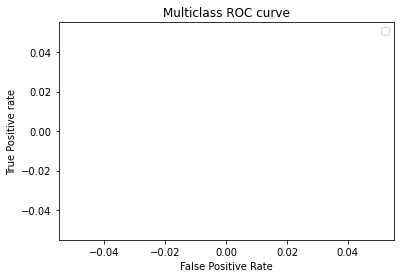

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
pred_prob = logisticRegr.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 28

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_pred, pred_prob[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):    
    plt.plot(fpr[i], tpr[i], linestyle='--',color=color[i])
# plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

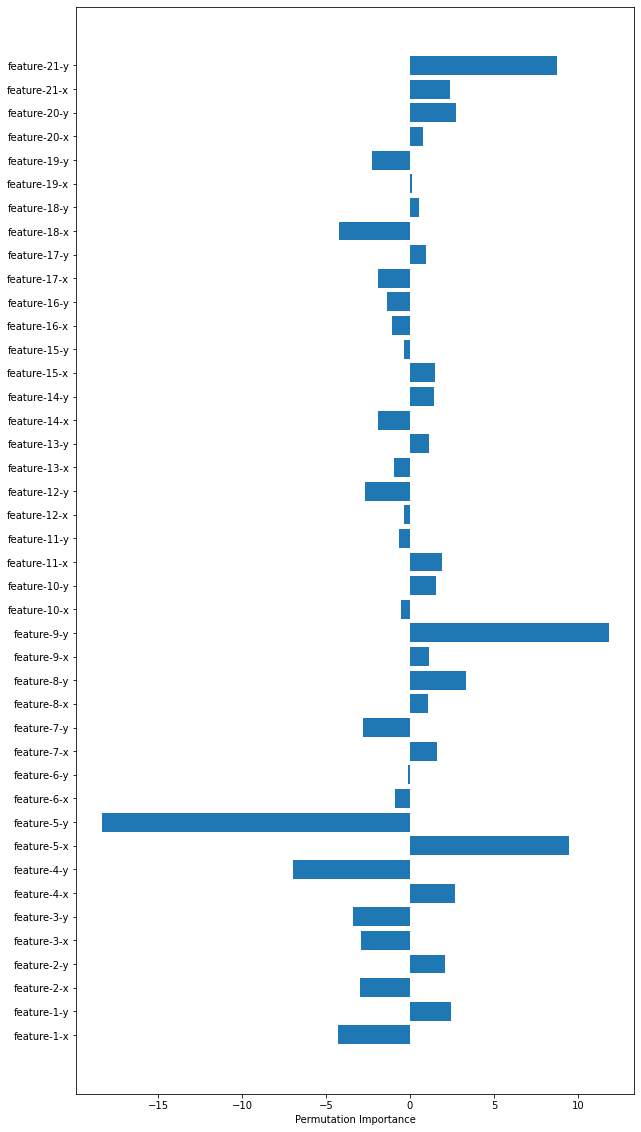

In [ ]:
importance = logisticRegr.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# plt.rcParams["figure.figsize"]=(40, 10)
# pyplot.bar(feature_names, importance)

plt.rcParams["figure.figsize"]=(10, 20)
plt.barh(feature_names, [x[1] for x in enumerate(importance)])
plt.xlabel("Permutation Importance")
plt.savefig('logreg_features.png')
# pyplot.show()

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
#Preprocessing
# X_total = np.array(df_final)
# Y_total = output_df[['output']].to_numpy()
#X_total_scaled = preprocessing.StandardScaler().fit(X_total)

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=28)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
score=metrics.accuracy_score(y_pred,y_test)
print('-----------KNN Accuracy on test set-------------------')
print(score)

-----------KNN Accuracy on test set-------------------
0.9326025172553796


In [ ]:
#loading the trained model into pickle file
filename = 'knn.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
#loading saved model pickle file
filename = 'knn.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9326025172553796


In [ ]:
eval_metrics = metrics.classification_report(y_test, y_pred,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
A,0.905473,0.930946,0.918033,391.000000
B,0.966903,0.978469,0.972652,418.000000
C,0.974708,0.986220,0.980431,508.000000
D,0.994036,0.932836,0.962464,536.000000
E,0.940503,0.934091,0.937286,440.000000
F,0.980695,0.984496,0.982592,516.000000
G,0.985348,0.987156,0.986251,545.000000
H,0.994083,0.986301,0.990177,511.000000
I,0.990268,0.971360,0.980723,419.000000
J,0.993333,0.969631,0.981339,461.000000


In [ ]:
predictions = classifier.predict(x_test)
label = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J',' K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U','V','W','X','Y','Z']
print(len(label))
cm = metrics.confusion_matrix(y_test, predictions, labels=label)
print(cm)

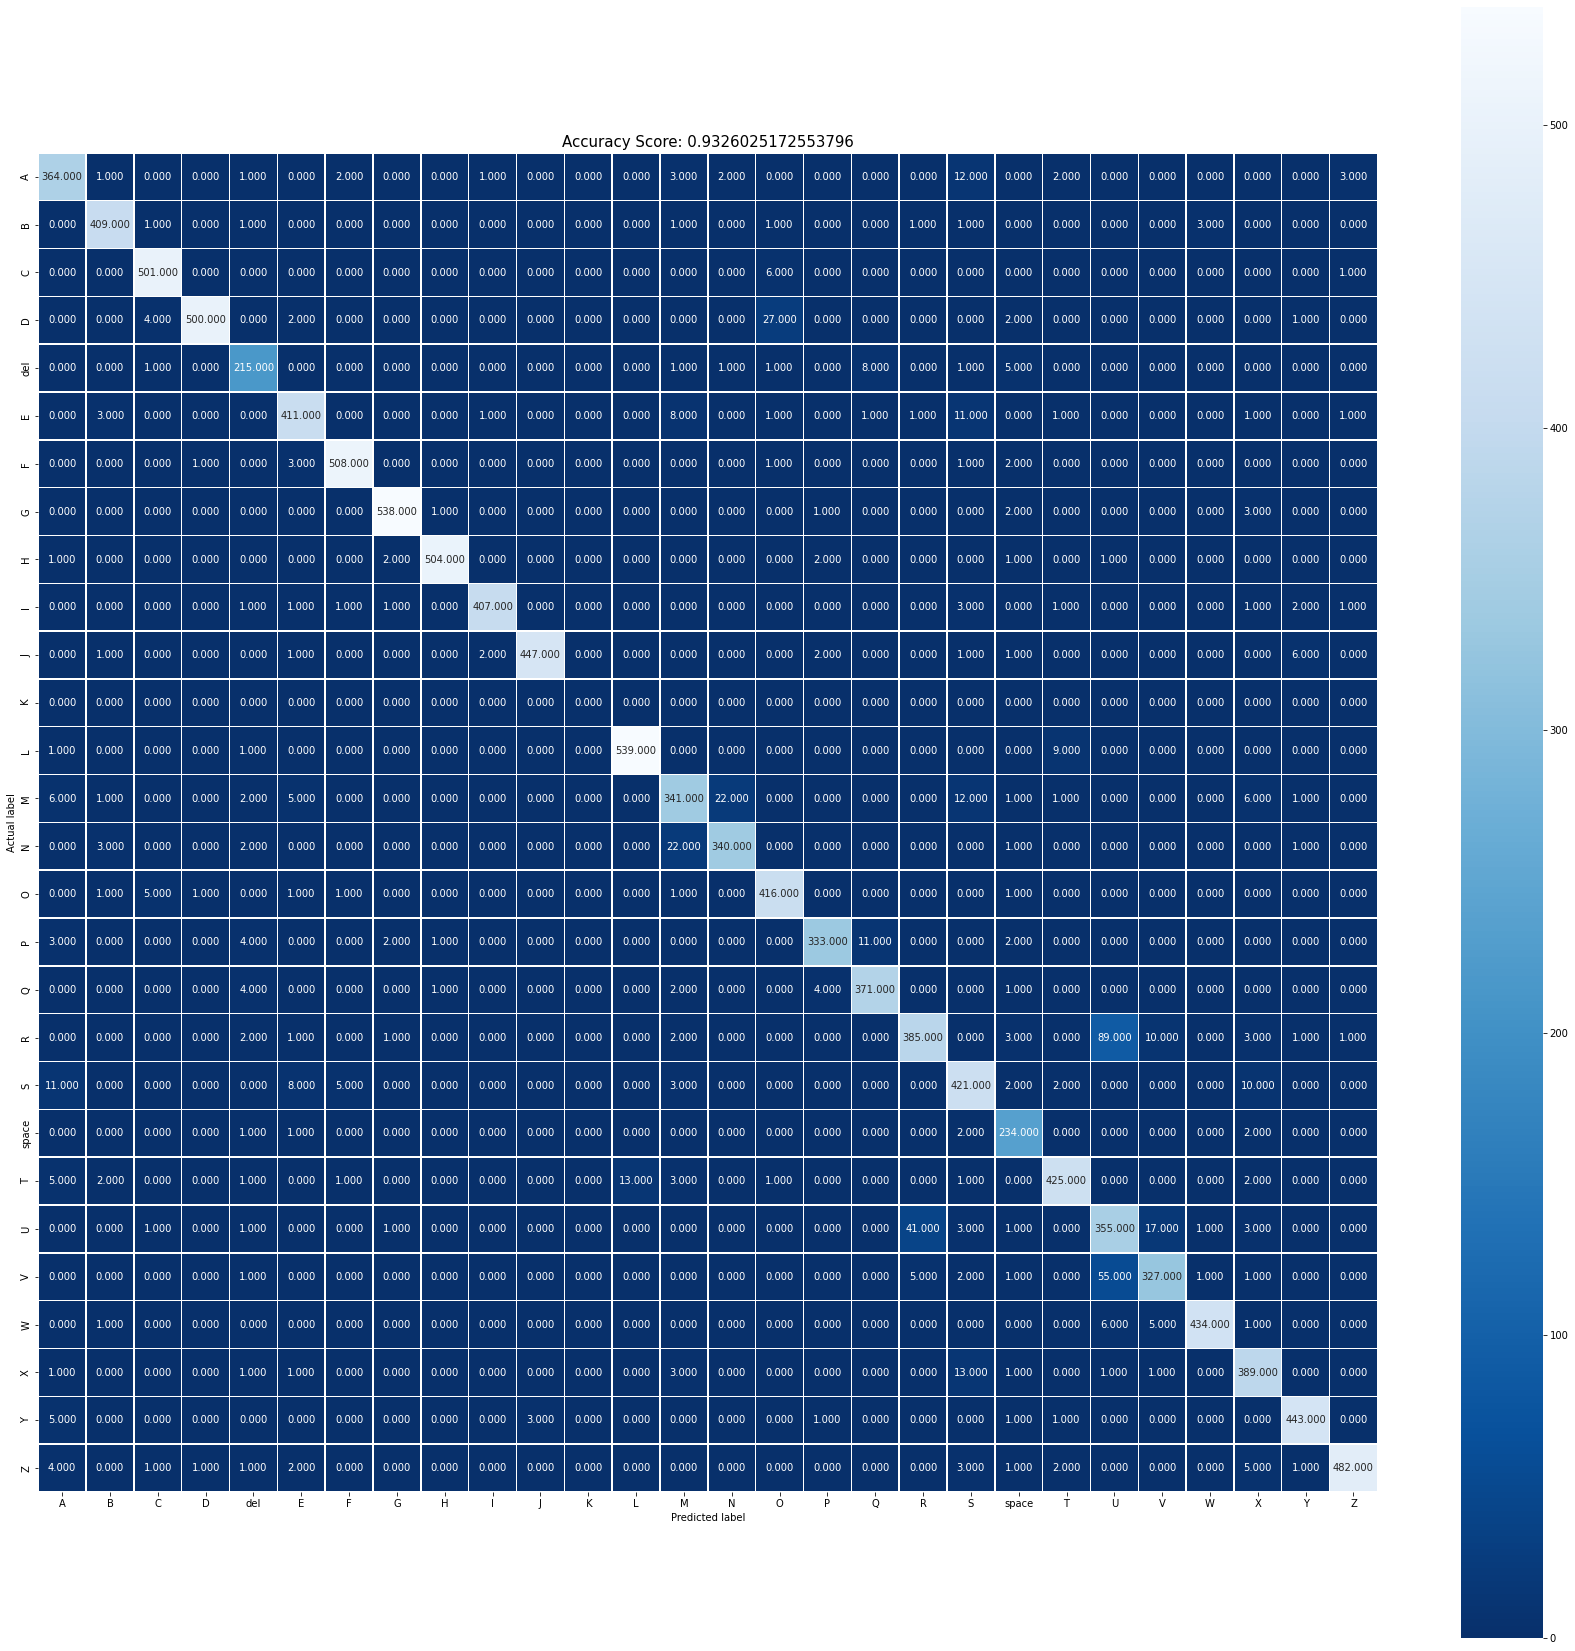

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=label, yticklabels=label);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

NameError: ignored

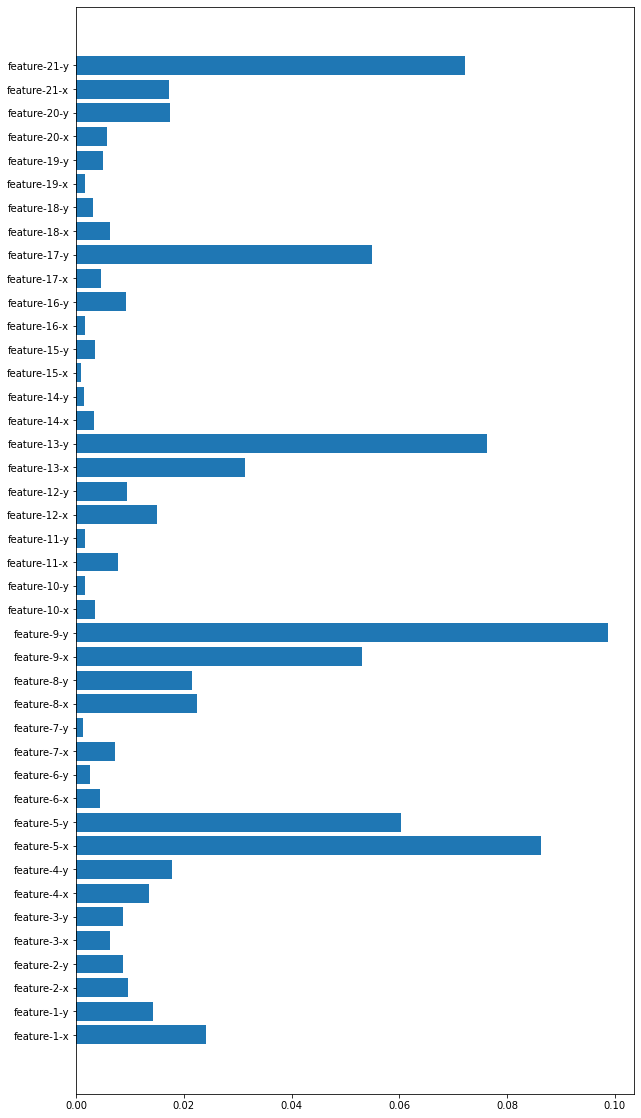

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(classifier, x_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.rcParams["figure.figsize"]=(10, 20)
plt.barh(feature_names, [x[1] for x in enumerate(importance)])
plt.savefig('knn_features.png')
pyplot.show()



# SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly') # Linear Kernel
clf.fit(x_train_res, y_train_res)

SVC(kernel='poly')

In [ ]:
y_pred_svm = clf.predict(x_test)

In [ ]:
score=metrics.accuracy_score(y_pred_svm,y_test)
print('-----------SVM Accuracy on test set-------------------')
print (score)

-----------SVM Accuracy on test set-------------------
0.9861956963053187


In [ ]:
#using different svm kernels and parameters and decision function shape as ovo for multiclass classification is suggested.....
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(x_train_res, y_train_res)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(x_train_res, y_train_res)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(x_train_res, y_train_res)
#sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(x_train_res, y_train_res)

In [ ]:
#different svm predictions
y_pred_linear = linear.predict(x_test)
y_pred_rbf = rbf.predict(x_test)
y_pred_poly = poly.predict(x_test)
#y_pred_sig = sig.predict(x_test)

In [ ]:
linear_accuracy = metrics.accuracy_score(y_pred_linear, y_test)
poly_accuracy = metrics.accuracy_score(y_pred_poly, y_test)
rbf_accuracy = metrics.accuracy_score(y_pred_rbf, y_test)
#sig_accuracy = metrics.accuracy_score()

In [ ]:
print("Linear Kernel Accuracy:", linear_accuracy)
print("Polynomial Kernel Accuracy:", poly_accuracy)
print("Radial Basis Accuracy:", rbf_accuracy)
#print(“Sigmoid Kernel Accuracy:”, sig_accuracy)

Linear Kernel Accuracy: 0.9720665854648802
Polynomial Kernel Accuracy: 0.9861956963053187
Radial Basis Accuracy: 0.9783191230207064


In [ ]:
#loading the trained model into pickle file
filename = 'svm.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#loading saved model pickle file
loaded_model = pickle.load(open('svm.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9861956963053187


In [ ]:
eval_metrics = metrics.classification_report(y_test, y_pred_svm,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
A,0.974425,0.974425,0.974425,391.000000
B,0.983412,0.992823,0.988095,418.000000
C,0.996071,0.998031,0.997050,508.000000
D,0.992537,0.992537,0.992537,536.000000
E,0.971047,0.990909,0.980877,440.000000
F,1.000000,0.986434,0.993171,516.000000
G,1.000000,0.998165,0.999082,545.000000
H,0.998039,0.996086,0.997062,511.000000
I,0.995204,0.990453,0.992823,419.000000
J,0.991379,0.997831,0.994595,461.000000


In [ ]:
predictions = clf.predict(x_test)
label = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J',' K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U','V','W','X','Y','Z']
print(len(label))
cm = metrics.confusion_matrix(y_test, predictions, labels=label)
print(cm)

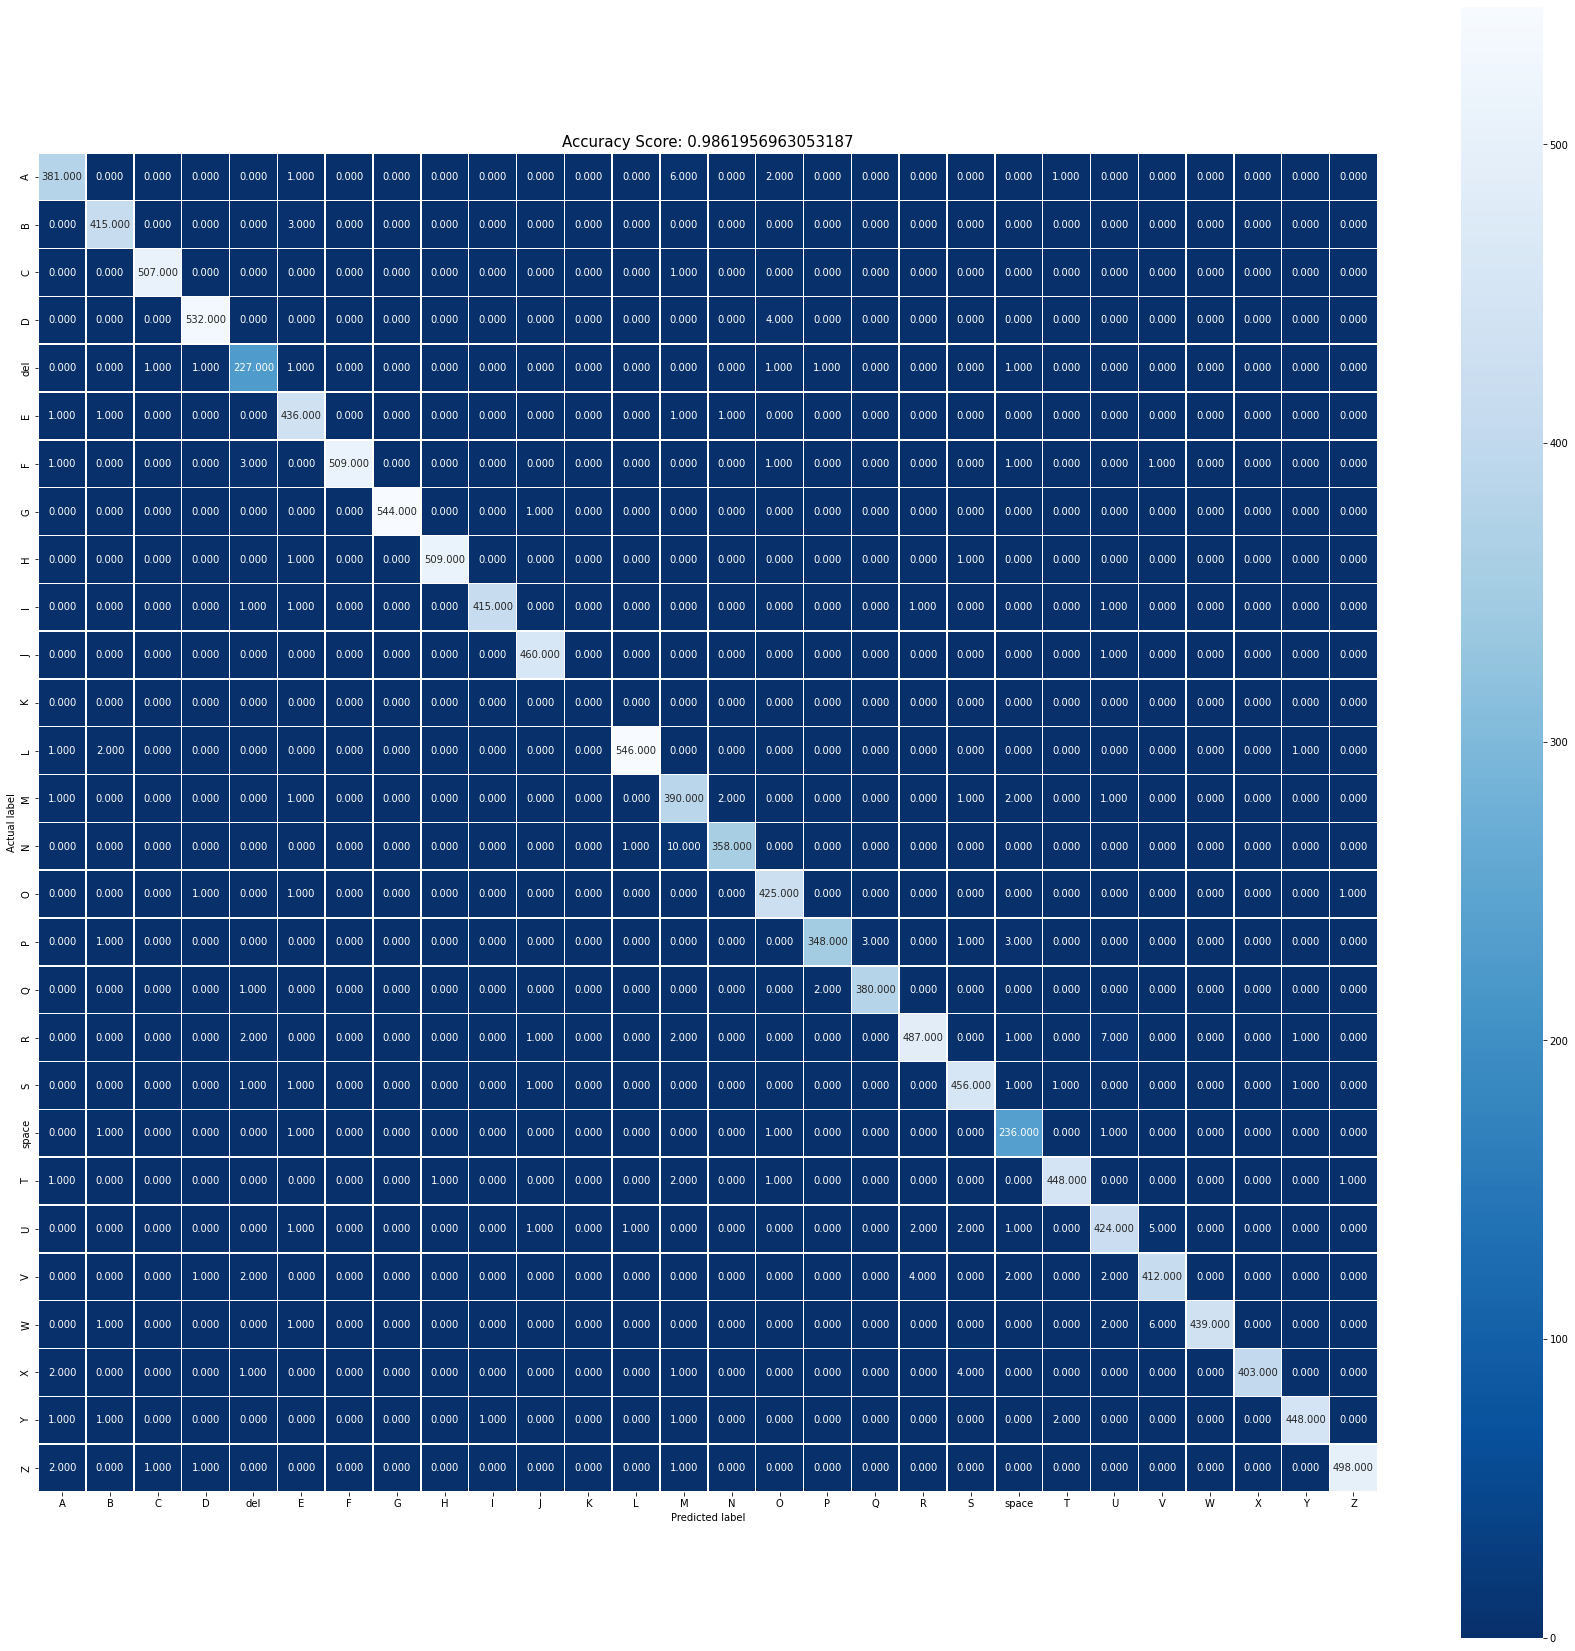

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=label, yticklabels=label);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(clf, x_test, y_test)
features = np.array(feature_names)



In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.rcParams["figure.figsize"]=(10, 20)
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig('svm_features.png')

NameError: ignored

#Neural Networks

In [ ]:
from sklearn.preprocessing import LabelEncoder
# X_total=X_total.astype(np.float64)
y_train_nn = LabelEncoder().fit_transform(y_train_res)
y_test_nn = LabelEncoder().fit_transform(y_test)
print((y_train_nn))
print((x_train_res))
n_features = x_train.shape[1]
n_class = len(np.unique(Y_total))
print (n_features,n_class)

[ 4 27 20 ... 27 27 27]
[[0.67026907 0.64538479 0.74663413 ... 0.43328443 0.63272786 0.46997052]
 [0.21532352 0.61857074 0.21360043 ... 0.55776864 0.18496513 0.54896975]
 [0.24063239 0.74267673 0.28163415 ... 0.62886113 0.18391998 0.66240788]
 ...
 [0.40479754 0.89979228 0.37530912 ... 0.8367023  0.36263352 0.82007539]
 [0.48322527 0.75224719 0.49808393 ... 0.59728906 0.07316807 0.57821543]
 [0.3652099  0.68718053 0.3317785  ... 0.60065133 0.35848152 0.58287276]]
42 28


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_test=x_test.astype(np.float64)
x_test.shape

(12315, 42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=n_features, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_class, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4300      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 28)                1428      
                                                                 
Total params: 10,778
Trainable params: 10,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_nn, test_size=0.20)

In [ ]:
# print (x_train)
# print (y_train)

In [ ]:
...
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(x_train_res, y_train_nn, epochs=150, batch_size=32, verbose=2)

In [ ]:
from numpy import argmax
y_pred_nn = model.predict(x_test)
y_pred_nn = argmax(y_pred_nn, axis=-1).astype('int')
print (y_pred_nn)

[12  2 10 ...  5  2 13]


In [ ]:
score=metrics.accuracy_score(y_pred_nn,y_test_nn)
print('-----------NN Accuracy on test set-------------------')
print (score)

-----------NN Accuracy on test set-------------------
0.9841656516443362


In [ ]:
model.save('NN.h5')

In [ ]:
eval_metrics = metrics.classification_report(y_test_nn, y_pred_nn,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
0,0.969466,0.974425,0.971939,391.000000
1,0.995204,0.992823,0.994012,418.000000
2,0.992157,0.996063,0.994106,508.000000
3,0.992467,0.983209,0.987816,536.000000
4,0.981735,0.977273,0.979499,440.000000
5,0.984645,0.994186,0.989392,516.000000
6,0.998155,0.992661,0.995400,545.000000
7,0.998035,0.994129,0.996078,511.000000
8,0.995181,0.985680,0.990408,419.000000
9,0.989247,0.997831,0.993521,461.000000


In [ ]:
asl_alphabet_list = ['A', 'B', 'C', 'D','E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
dict_asl = dict(list(enumerate(asl_alphabet_list)))


In [ ]:
dict_asl

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
dict_asl[0]

'A'

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train_res, y_train_res)


GaussianNB()

In [ ]:
#Predict the response for test dataset
y_pred_nb = gnb.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.48144539179861956


In [ ]:
#loading the trained model into pickle file
filename = 'gnb.sav'
pickle.dump(gnb, open(filename, 'wb'))

In [ ]:
#loading saved model pickle file
loaded_model = pickle.load(open('gnb.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.48144539179861956


In [ ]:
y_train_nn

array([ 4, 27, 20, ..., 27, 27, 27])

No handles with labels found to put in legend.


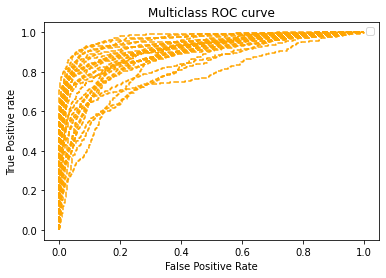

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
pred_prob = gnb.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 28

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_nn, pred_prob[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):    
    plt.plot(fpr[i], tpr[i], linestyle='--',color='orange')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [ ]:
eval_metrics = metrics.classification_report(y_test_nn, y_pred_nb,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
0,0.369803,0.432225,0.398585,391.000000
1,0.669856,0.669856,0.669856,418.000000
2,0.730612,0.704724,0.717435,508.000000
3,0.727088,0.666045,0.695229,536.000000
4,0.197115,0.465909,0.277027,440.000000
5,0.953846,0.720930,0.821192,516.000000
6,0.927152,0.513761,0.661157,545.000000
7,0.777302,0.710372,0.742331,511.000000
8,0.273034,0.579952,0.371276,419.000000
9,0.867052,0.650759,0.743494,461.000000


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_res,y_train_res)

y_pred=clf.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9790499390986601


In [ ]:
#loading the trained model into pickle file
filename = 'random_forest.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#loading saved model pickle file
loaded_model = pickle.load(open('random_forest.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9790499390986601


In [ ]:
eval_metrics = metrics.classification_report(y_test, y_pred,output_dict=True)
eval_metrics_df = pd.DataFrame(eval_metrics).transpose() 
display(eval_metrics_df)

,precision,recall,f1-score,support
A,0.982005,0.976982,0.979487,391.00000
B,0.976415,0.990431,0.983373,418.00000
C,0.984466,0.998031,0.991202,508.00000
D,0.996219,0.983209,0.989671,536.00000
E,0.984018,0.979545,0.981777,440.00000
F,0.982692,0.990310,0.986486,516.00000
G,0.996337,0.998165,0.997250,545.00000
H,0.998035,0.994129,0.996078,511.00000
I,0.995192,0.988067,0.991617,419.00000
J,0.989247,0.997831,0.993521,461.00000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

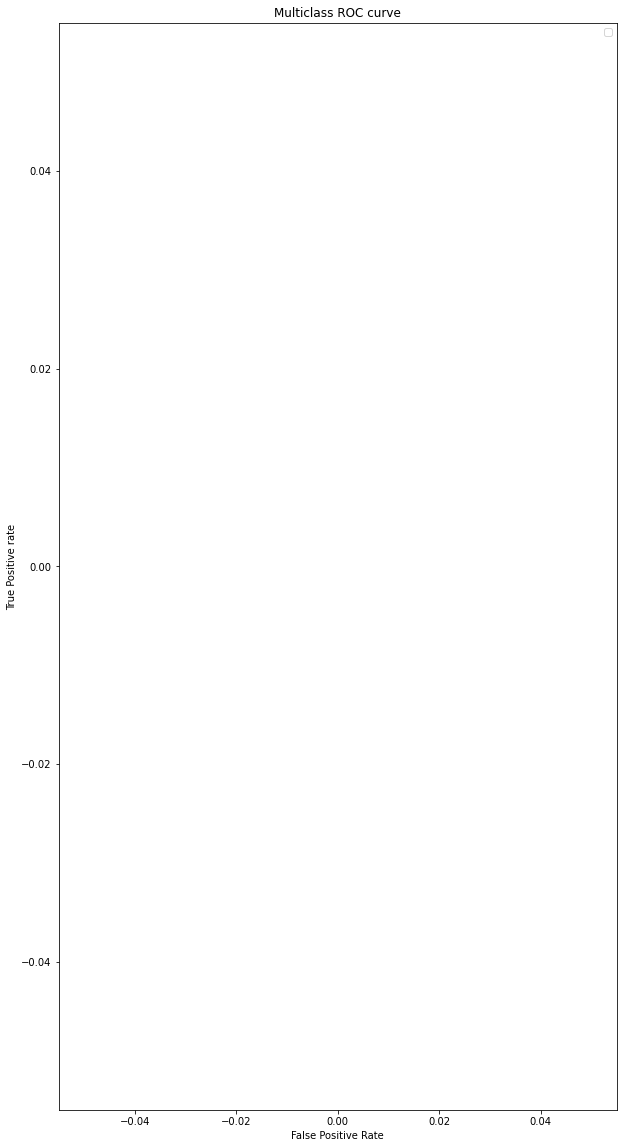

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
pred_prob = loaded_model.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 28

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
for i in range(n_class):    
    plt.plot(fpr[i], tpr[i], linestyle='--',color='orange')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

Feature: 0, Score: 0.02991
Feature: 1, Score: 0.02509
Feature: 2, Score: 0.01867
Feature: 3, Score: 0.02085
Feature: 4, Score: 0.01355
Feature: 5, Score: 0.02560
Feature: 6, Score: 0.01808
Feature: 7, Score: 0.03501
Feature: 8, Score: 0.03642
Feature: 9, Score: 0.06419
Feature: 10, Score: 0.01373
Feature: 11, Score: 0.02143
Feature: 12, Score: 0.01482
Feature: 13, Score: 0.01719
Feature: 14, Score: 0.02399
Feature: 15, Score: 0.02679
Feature: 16, Score: 0.03671
Feature: 17, Score: 0.05060
Feature: 18, Score: 0.01041
Feature: 19, Score: 0.02182
Feature: 20, Score: 0.00935
Feature: 21, Score: 0.01641
Feature: 22, Score: 0.01429
Feature: 23, Score: 0.02230
Feature: 24, Score: 0.02380
Feature: 25, Score: 0.04097
Feature: 26, Score: 0.01008
Feature: 27, Score: 0.01983
Feature: 28, Score: 0.00692
Feature: 29, Score: 0.01982
Feature: 30, Score: 0.01067
Feature: 31, Score: 0.02615
Feature: 32, Score: 0.01892
Feature: 33, Score: 0.04478
Feature: 34, Score: 0.01257
Feature: 35, Score: 0.02208
Fe

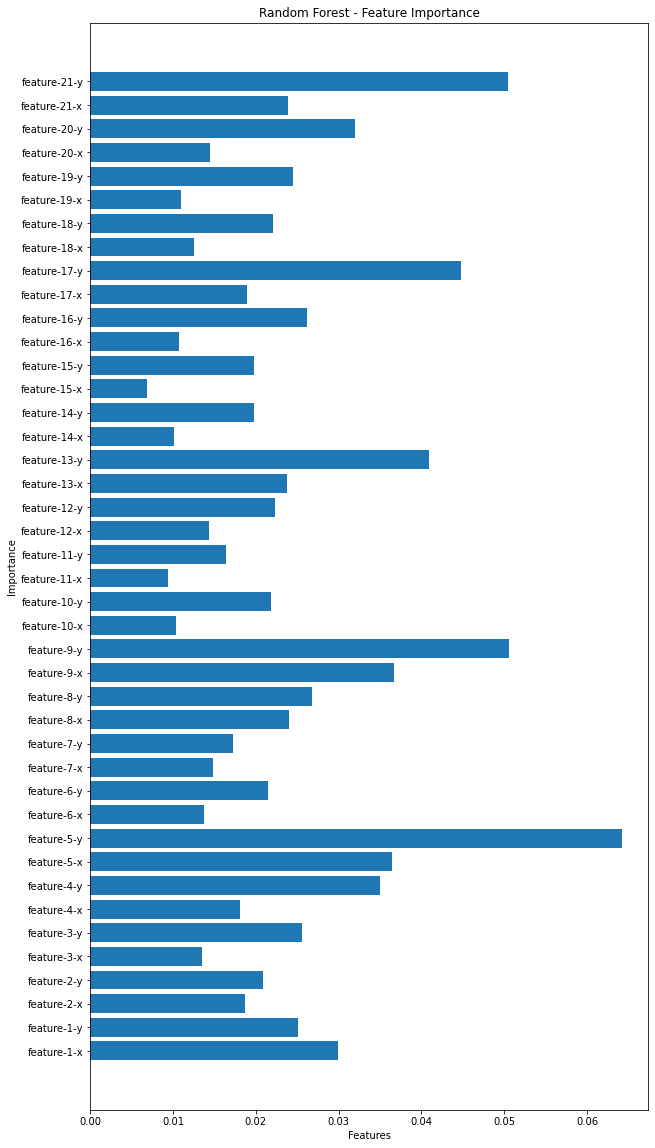

In [ ]:
from matplotlib import pyplot as plt
importance = loaded_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plt.bar([x for x in range(len(importance))], importance)
# plt.title('Random Forest - Feature Importance')
# plt.xlabel('Features')
# plt.ylabel('Importance')
# pyplot.show()


plt.rcParams["figure.figsize"]=(10, 20)
plt.barh(feature_names, [x[1] for x in enumerate(importance)])
plt.title('Random Forest - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig('random_forest_features.png')